# Personal Information
Name: **Thomas Erhard**

StudentID: **15081931**

Email: [**thomas.erhard@student.uva.nl**](thomas.erhard@student.uva.nl)

Submitted on: **22.03.2024**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
# Load your data here
df_jobs = pd.read_csv("../data/jobs.csv")
df_jobs

,Job Length,Job Resource 1,Job Resource 2
0,16,1.0,10.0
1,2,2.0,9.0
2,3,6.0,2.0
3,3,1.0,9.0
4,21,10.0,1.0
...,...,...,...
99995,3,1.0,5.0
99996,1,2.0,7.0
99997,17,1.0,7.0
99998,3,2.0,7.0


### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [3]:
# Also don't forget to comment your code
# This way it's also easier to spot thought errors along the way

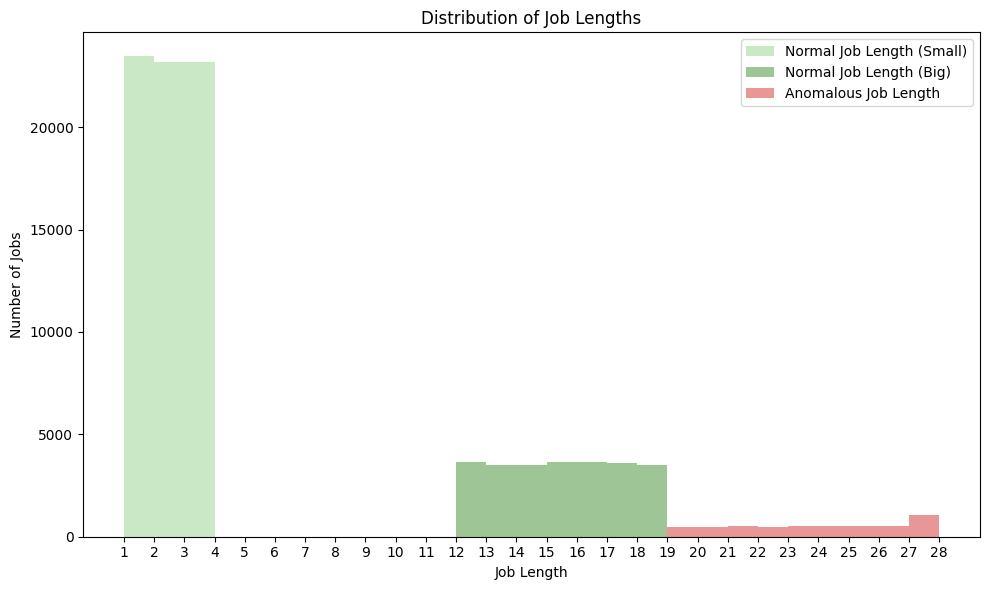

In [32]:
# Splitting the jobs into two categories based on length
jobs_small = df_jobs[df_jobs['Job Length'] <= 3.6 ]['Job Length']
jobs_big = df_jobs[(df_jobs['Job Length'] >= 12) & (df_jobs['Job Length'] <= 18)]['Job Length']
jobs_anomalous = df_jobs[df_jobs['Job Length'] > 18]['Job Length']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting histograms for each category of job lengths
plt.hist(jobs_small, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Normal Job Length (Small)', color="#96D38C")
plt.hist(jobs_big, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Normal Job Length (Big)', color="#3C8D2F")
plt.hist(jobs_anomalous, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Anomalous Job Length', color="#D32F2F")

# Customization
plt.title('Distribution of Job Lengths')
plt.xlabel('Job Length')
plt.ylabel('Number of Jobs')
plt.xticks(range(1, df_jobs['Job Length'].max() + 1))  # Adjust x-axis ticks for clarity
plt.legend()  # Add a legend to distinguish between categories

# Show plot
plt.tight_layout()  # Adjust layout to make room for the plot elements
plt.show()

In [30]:
# Unqiue job lengths
np.unique(df_jobs['Job Length'])

array([ 1,  2,  3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28])

In [33]:
# Total number of jobs
total_jobs = len(df_jobs)

# Normal and Anomalous Jobs
normal_jobs = df_jobs[df_jobs['Job Length'] <= 18]
anomalous_jobs = df_jobs[df_jobs['Job Length'] > 18]

# Small and Big Jobs (within normal jobs)
small_jobs = df_jobs[df_jobs['Job Length'] <= 3.6]
big_jobs = df_jobs[(df_jobs['Job Length'] > 3.6) & (df_jobs['Job Length'] <= 18)]

# Calculate counts
count_normal = len(normal_jobs)
count_anomalous = len(anomalous_jobs)
count_small = len(small_jobs)
count_big = len(big_jobs)

# Calculate proportions
prop_normal = count_normal / total_jobs
prop_anomalous = count_anomalous / total_jobs
prop_small = count_small / total_jobs
prop_big = count_big / total_jobs

# Print results
print(f"Total Jobs: {total_jobs}")
print(f"Normal Jobs: {count_normal} ({prop_normal:.2%})")
print(f"Anomalous Jobs: {count_anomalous} ({prop_anomalous:.2%})")
print(f"Small Jobs: {count_small} ({prop_small:.2%})")
print(f"Big Jobs: {count_big} ({prop_big:.2%})")

Total Jobs: 100000
Normal Jobs: 94895 (94.89%)
Anomalous Jobs: 5105 (5.10%)
Small Jobs: 69841 (69.84%)
Big Jobs: 25054 (25.05%)


We can observe, that the job lengths are in two categorised into two categories, normal and anomalous jobs. Anomalous jobs have a lengths of 18 or higher, while jobs with a length equal or less than 18 are considered normal. It can be observed, that the distribution of normal jobs is quite interesting, with again two categories, small and big jobs. Small jobs are defined as $[1, J_L /5] = [1, 18 /5] = [1, 3.6]$ and big jobs are defined as $[J_L * 2/3, J_L] = [18 * 2/3, 18] = [12, 18]$,

where $J_L$ = Job Length.

There are no jobs



### Analysis 2: 

In [4]:
# ...

### Analysis n:

In [5]:
# ...